<a href="https://colab.research.google.com/github/jdomeneghini/Data_Science/blob/master/Analisando_dados_Airbnb_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando os Dados do Airbnb - Los Angeles**

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a maior empresa hoteleira da atualidade. Ah, o detalhe é que ele não possui nenhum hotel!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões de pessoas** ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

**Neste notebook irei analisar os dados da cidade de Los Angeles, e ver quais insights podem ser extraídos a partir de dados brutos.**

### **Sobre Los Angeles**

Los Angeles é uma grande cidade do sul da Califórnia e também o centro da indústria de cinema e televisão do país. Perto do famoso letreiro de Hollywood, é possível conhecer os bastidores das produções nos estúdios Paramount Pictures, Universal e Warner Brothers. Na Hollywood Boulevard, o TCL Chinese Theatre exibe impressões de mãos e pés de celebridades na Calçada da Fama, uma homenagem a milhares de astros, e se pode comprar mapas das casas dos artistas.
*Fonte: Google

### **Obtenção dos Dados**

Estes dados foram obtidos a partir do site [Inside Airbnb](https://http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

-*listings.csv - Summary information and metrics for listings in Vancouver (good for visualisations).*

*Este arquivo se trata de uma base resumida

In [0]:
#importando os pacotes 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
#importando o arquivo para um DataFrame
df= pd.read_csv("http://data.insideairbnb.com/united-states/ca/los-angeles/2019-12-05/visualisations/listings.csv")

### **Análise dos Dados**

Nesta etapa o objetivo é verificar e entender como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, irei analisar as 5 primeiras entradas do dataset.

In [0]:
#mostrando as 5 primeiras entradas do dataset
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,248
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.19,1,62
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,22,2019-08-31,0.33,2,252
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,20,2019-10-03,0.19,2,344
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


### **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? E quais os tipos das váriaveis?**









In [0]:
#identificando o volume de dados do DataFrame
print('Váriaveis:\t {}'.format(df.shape[0]))
print('Entradas:\t {}'.format(df.shape[1]))

#verificando os tipos de variaveis presentes do dataset
df.dtypes



Váriaveis:	 40125
Entradas:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Qual a porcentagem de valores ausentes (NaN) no dataset?**



A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

É possivel identificar que as colunas *'reviews_per_month'* e *'last_review'* possuem 20% de valores faltantes.

E a coluna *'host_name'* aproximadamente 0,1%




In [0]:
#ordenando em ordem decrescente as variaveis de acordo com os valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending= False)

reviews_per_month                 0.202991
last_review                       0.202991
host_name                         0.010841
name                              0.000050
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **3. Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, irei plotar um histograma.

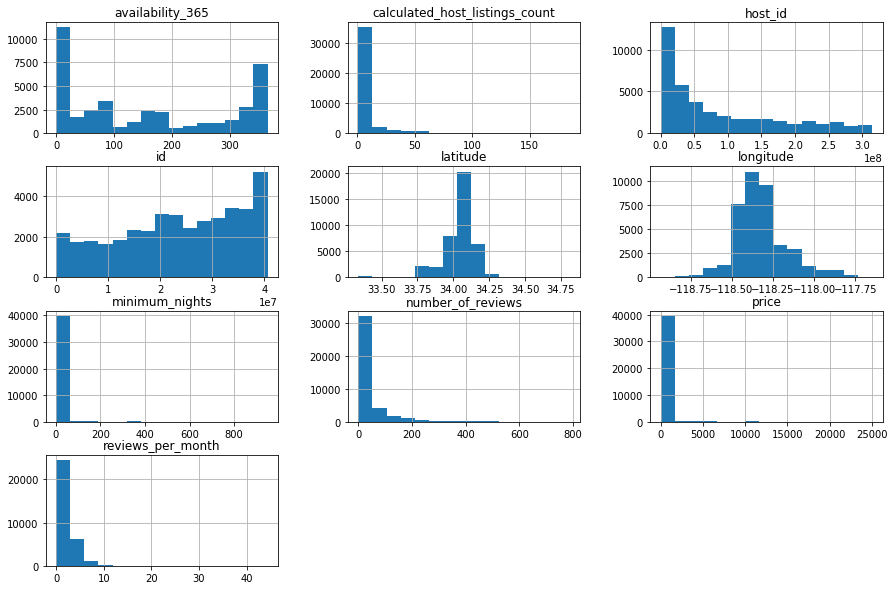

In [0]:
#plotando um histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **4. Há outliers presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

*   Resumo estatístico por meio do método describe()
*   Plotar boxplots para a variável.


In [0]:
#resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
    'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40125.000000,40125.000000,40125.000000,31980.000000,40125.000000,40125.000000
mean,225.840673,10.867688,34.082069,1.870650,7.659539,158.237458
std,656.723597,20.848665,61.568212,1.971808,19.448746,139.786661
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,70.000000,1.000000,1.000000,0.360000,1.000000,7.000000
50%,110.000000,2.000000,8.000000,1.150000,2.000000,133.000000
75%,189.000000,30.000000,39.000000,2.820000,5.000000,317.000000
max,25000.000000,950.000000,788.000000,44.380000,185.000000,365.000000


Olhando o resumo estatístico acima podemos observar que:


*   A variável `price` possui 75% dos valores abaixo de 189 porém o seu valor máximo é de 25.000.
*   A quantidade mínima de noite (`minimum_nights`) está acima do limite real (365 dias).





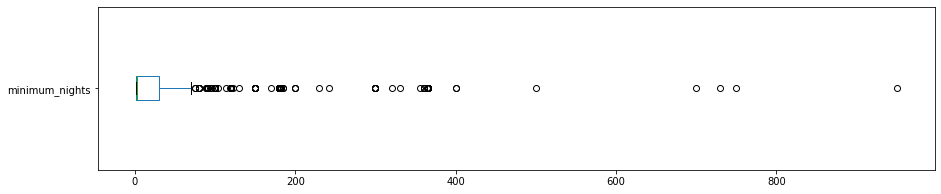

minimum_nights: valores acima de 30 dias
2708 entradas
6.7489%


In [0]:
#bloxpot para minimun_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#visualizando a qtd de valores acima de 30 dias para minimum_nights

print('minimum_nights: valores acima de 30 dias')
print('{} entradas'.format(len(df[df.minimum_nights >30])))
print('{:.4f}%'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

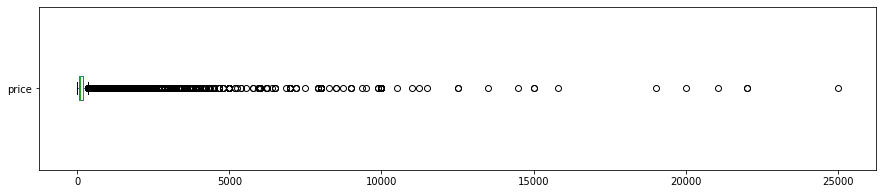

price: valores acima de $650
1846 entradas
4.6006%


In [0]:
#boxplot para price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#visualizando a qtd de valores acima de $650 para price

print('price: valores acima de $650')
print('{} entradas'.format(len(df[df.price > 650])))
print('{:.4f}%'.format((len(df[df.price > 650]) / df.shape[0])*100))

### Histograma sem outliers

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.


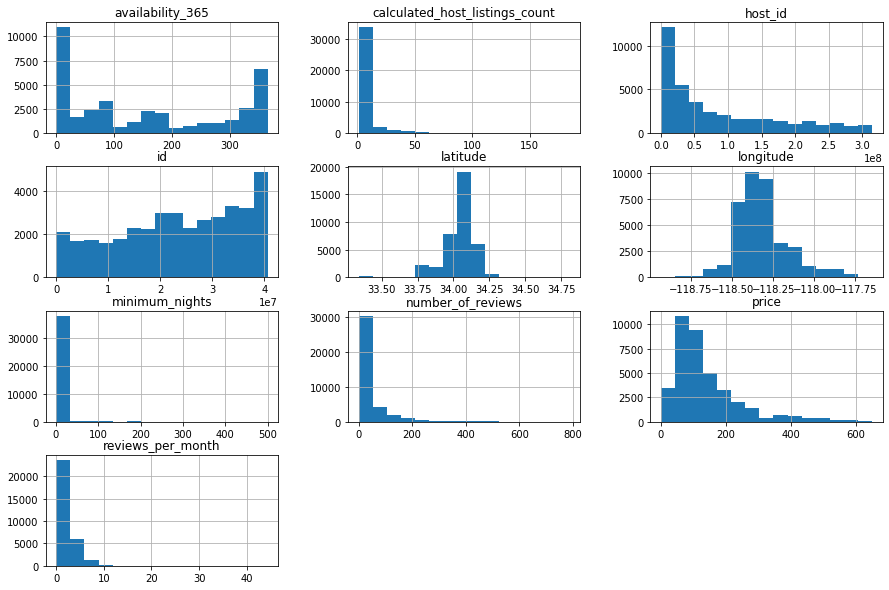

In [0]:
#removendo os outliers em um novo DataFrame
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 650].index, axis=0, inplace= True)
df_clean.drop(df_clean[df_clean.minimum_nights > 650].index, axis=0, inplace= True) 

#plotando o histograma
df_clean.hist(bins=15, figsize=(15,10));




**4. Qual a correlação existente entre as variáveis?**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação (função 'corr') estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

*   Criar uma matriz de correlação
*   Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn





In [0]:
#criando uma matriz de correlação
corr= df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count','availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.003319,-0.066313,-0.075647,0.068406,0.083153
minimum_nights,-0.003319,1.000000,-0.076763,-0.184773,0.190719,0.055590
number_of_reviews,-0.066313,-0.076763,1.000000,0.620762,-0.081727,0.026408
reviews_per_month,-0.075647,-0.184773,0.620762,1.000000,-0.066992,-0.001048
calculated_host_listings_count,0.068406,0.190719,-0.081727,-0.066992,1.000000,0.153763
availability_365,0.083153,0.055590,0.026408,-0.001048,0.153763,1.000000


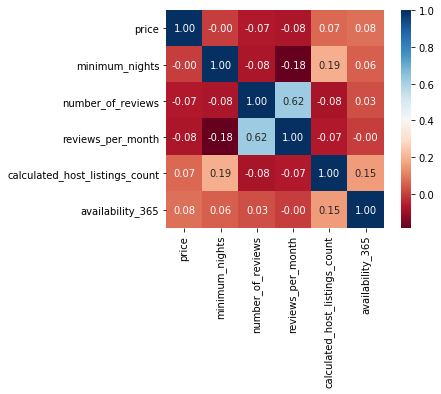

In [0]:
#gerando um heatmap (mapa de calor)
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square= True, linecolor='white', annot=True);

**5. Qual o tipo de imovel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método *value_counts()*.

In [0]:
#quantidade de cada tipo de imovel disponivel

df_clean.room_type.value_counts()

Entire home/apt    21386
Private room       12598
Shared room         1355
Hotel room           318
Name: room_type, dtype: int64

In [0]:
#porcentagem de cada tipo de imóvel disponível
room_type= df_clean.room_type.value_counts() / df_clean.shape[0] *100

print(room_type)

Entire home/apt    61.296896
Private room       34.013481
Shared room         3.858815
Hotel room          0.830808
Name: room_type, dtype: float64


Com isso concluimos que:
*   61% se referem a alugueis de Casa/Apto inteiro
*   34% se referem a alugueis de Quartos privados
*   3% se referem a alugueis de Quartos compartilhados






**6. Qual a localidade mais cara de Los Angeles?**

Uma maneira de se verificar uma variável em função da outra é usando groupby(). No caso, queremos comparar os bairros (neighbourhoods) a partir do preço de locação.

In [0]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:20]

neighbourhood
Unincorporated Catalina Island           571.500000
Avalon                                   413.705128
Malibu                                   326.726316
Tujunga Canyons                          312.500000
Bel-Air                                  288.764706
Beverly Crest                            281.604938
Palos Verdes Estates                     265.272727
Unincorporated Santa Monica Mountains    259.928571
East Whittier                            257.500000
Pacific Palisades                        241.158273
Manhattan Beach                          236.452632
San Marino                               233.181818
Hollywood Hills West                     232.215584
Universal City                           226.600000
North Whittier                           220.000000
Century City                             217.826087
Marina del Rey                           208.393665
Castaic Canyons                          207.952381
Venice                                   205.14832

In [0]:
#ver a qtd de imoveis para Ilha de Catalina 

catalina = print(df[df.neighbourhood == 'Unincorporated Catalina Island'].shape)

df[df.neighbourhood == 'Unincorporated Catalina Island']

(3, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
15376,20459222,"Spacious End Villa, Large Balcony, Wood Floors...",129783732,Oranj Palm Vacation Homes,Unincorporated Areas,Unincorporated Catalina Island,33.35635,-118.33070,Entire home/apt,516,3,1,2018-06-20,0.06,75,315
23171,27837348,"Recently Remodeled 2 Bed, 2 Bath Condo With Wr...",129783732,Oranj Palm Vacation Homes,Unincorporated Areas,Unincorporated Catalina Island,33.35592,-118.33103,Entire home/apt,627,3,0,NaN,NaN,75,319
32574,36072686,Casa Tortuga,25078465,Beachy,Unincorporated Areas,Unincorporated Catalina Island,33.35633,-118.33306,Entire home/apt,2000,3,1,2019-07-10,0.20,2,365


Como podemos ver de 40125 registros presentes, somente 3 pertencem ao local mais caro para locação


**Latitude e Longitude**

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.


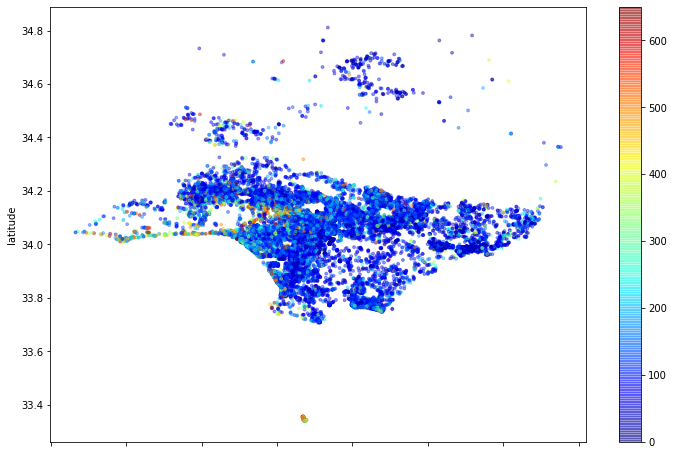

In [0]:
#Plotando os imoveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Conclusão**

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. A  presença destes outliers pode implicar em alguns resultados distorcidos.

Também nota-se que em algumas localidades há poucos imóveis disponíveis, o que pode também distorcer as informações estatísticas de alguns atributos.

Para melhores resultados recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completo.
